In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage


In [60]:
pwd


'/home/destroyer/Documents'

In [3]:
train_dataset = h5py.File('train_catvnoncat.h5',"r")
test_dataset = h5py.File('test_catvnoncat.h5',"r")


In [4]:
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y = np.array(train_dataset["train_set_y"][:]).reshape((1,209)) # your train set labels
print(train_set_x_orig.shape)
print(train_set_y.shape)

(209, 64, 64, 3)
(1, 209)


In [5]:
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y = np.array(test_dataset["test_set_y"][:]).reshape((1,50)) # your test set labels
print(test_set_x_orig.shape)
print(test_set_y.shape)

(50, 64, 64, 3)
(1, 50)


In [64]:
classes = np.array(test_dataset["list_classes"][:])
print(classes.shape)

(2,)


y = 0, it's a 'non-cat' picture.


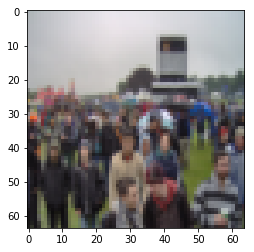

In [9]:
index = 100
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[0,index]) + ", it's a '" + classes[np.squeeze(train_set_y[0,index])].decode("utf-8") +  "' picture.")


In [10]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [13]:
x_train_flatten = train_set_x_orig.reshape(m_train,-1).T
x_test_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

print ("train_set_x_flatten shape: " + str(x_train_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(x_test_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(x_train_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [18]:
test_set_x = x_test_flatten/255
train_set_x = x_train_flatten/255
train_set_x.shape


(12288, 209)

In [15]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(9.2) = " + str(sigmoid(9.2)))

sigmoid(0) = 0.5
sigmoid(9.2) = 0.9998989708060922


In [21]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    assert(w.shape == (dim,1))
    return w,b
#dim = 2
#w, b = initialize_with_zeros(dim)
#print ("w = " + str(w))
#print ("b = " + str(b))

In [46]:
def propagate(w,x,y,b):
    m = x.shape[0]
    z = np.dot(w.T,x) + b
    #print(b.shape)
    #print(w.T.shape)
    #print(x.shape)
    #print(z.shape)
    a = sigmoid(z)
    #print(a.shape)
    J = -np.sum(y * np.log(a) + ((1-y) * np.log(1-a)))/m
    db = np.sum(a-y)/m
    dw = np.dot(x,(a-y).T)/m
    # print(dw.shape)
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(J)
    assert(cost.shape == ())
    grads = {"dw":dw,"db":db}
    return grads, cost
#w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
#grads, cost = propagate(w, X, Y,b)
#print ("dw = " + str(grads["dw"]))
#print ("db = " + str(grads["db"]))
#print ("cost = " + str(cost))

In [87]:
def optimize(w,b,x,y,num_iter,alpha):
    costs = []
    for i in range(num_iter):
        grads,cost = propagate(w,x,y,b)
        w = w - grads["dw"]*alpha
        b = b - grads["db"]*alpha
        if i%100 == 0:
            costs.append(cost)
        #if i % 100 == 0:
        #    print ("Cost after iteration %i: %f" % (i, cost))
    params = {"w":w,"b":b}
    grad = {"w":grads["dw"],"b":grads["db"]}
    return params, grad, costs
#params, grads, costs = optimize(w, b, X, Y,100,0.009)

#print ("w = " + str(params["w"]))
#print ("b = " + str(params["b"]))
#print ("dw = " + str(grads["w"]))
#print ("db = " + str(grads["b"]))


In [24]:
def predict(w,x,b):
    z_cap = np.dot(w.T,x) + b
    y_cap = sigmoid(z_cap)
    y_pred = np.zeros((1,x.shape[1]))
    for i in range(y_cap.shape[1]):
        if y_cap[0,i]>0.5:
            y_pred[0][i]=1
        else:
            y_pred[0,i]=0
    assert(y_pred.shape == (1,x.shape[1]))
    return y_pred
#print("predictions = " + str(predict(w, X, b)))


In [49]:
def model(x_train,y_train,x_test,y_test,num_iters=2000,alpha=0.5):
    w = np.zeros((x_train.shape[0],1))
    b = 0
    params,grads,costs = optimize(w,b,x_train,y_train,num_iters,alpha)
    w = params["w"]
    b = params["b"]
    y_pred_test = predict(w,x_test,b)
    y_pred_train = predict(w,x_train,b)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))
    d = {"costs": costs,
         "Y_prediction_test": y_pred_test, 
         "Y_prediction_train" : y_pred_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : alpha,
         "num_iterations": num_iters}
    
    return d
    
    

In [48]:
print(test_set_x.shape)

(12288, 50)


In [81]:
d = model(train_set_x,train_set_y,test_set_x,test_set_y)

Cost after iteration 0: 0.011789
Cost after iteration 100: 0.028030
Cost after iteration 200: 0.020718
Cost after iteration 300: 0.013577
Cost after iteration 400: 0.009705
Cost after iteration 500: 0.006556
Cost after iteration 600: 0.004175
Cost after iteration 700: 0.002987
Cost after iteration 800: 0.002703
Cost after iteration 900: 0.002512
Cost after iteration 1000: 0.002349
Cost after iteration 1100: 0.002207
Cost after iteration 1200: 0.002080
Cost after iteration 1300: 0.001967
Cost after iteration 1400: 0.001865
Cost after iteration 1500: 0.001773
Cost after iteration 1600: 0.001689
Cost after iteration 1700: 0.001612
Cost after iteration 1800: 0.001541
Cost after iteration 1900: 0.001477
train accuracy: 99.52153110047847 %
test accuracy: 70.0 %


In [82]:
print(d["Y_prediction_train"][0,5])

0.0


y = 1, you predicted that it is a "b'non-cat'" picture.


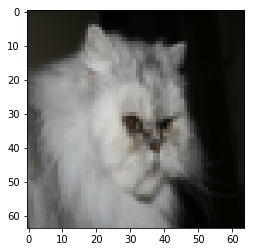

In [83]:
index = 10
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0, index]) + ", you predicted that it is a \"" +str( classes[int(d["Y_prediction_train"][0,index])]) +  "\" picture.")


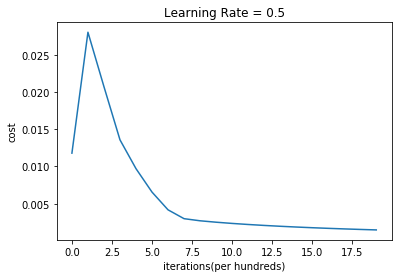

In [85]:
costs = np.squeeze(d["costs"])
plt.plot(costs)
plt.xlabel("iterations(per hundreds)")
plt.ylabel("cost")
plt.title("Learning Rate = " + str(d["learning_rate"]))
plt.show()

Learning rate is 0.5
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

	---------------------------------

Learning rate is 0.05
train accuracy: 87.5598086124402 %
test accuracy: 64.0 %

	---------------------------------

Learning rate is 0.005
train accuracy: 67.46411483253588 %
test accuracy: 36.0 %

	---------------------------------

Learning rate is 0.0005
train accuracy: 65.55023923444976 %
test accuracy: 34.0 %

	---------------------------------



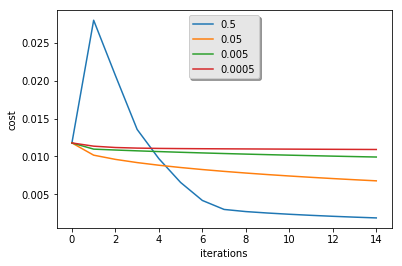

In [93]:
models = {}
learning_rates = [0.5, 0.05, 0.005, 0.0005]
for i in learning_rates:
    print("Learning rate is " + str(i))
    models[str(i)] = model(train_set_x,train_set_y,test_set_x,test_set_y,1500,i)
    print("\n\t---------------------------------\n")
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
plt.ylabel('cost')
plt.xlabel('iterations')
#plt.yscale(0.1)
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()
    

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  after removing the cwd from sys.path.


y = 1.0, your algorithm predicts a "cat" picture.


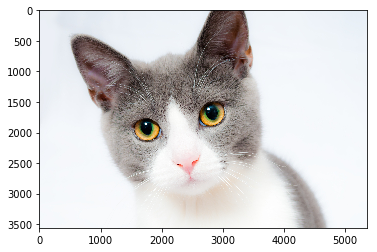

In [98]:
my_image = "cat.jpg"
fname = "/home/destroyer/MLimages/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px, num_px)).reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(d["w"], my_image,d["w"])

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")
